In [238]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [239]:
import pickle
########### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "risorse/Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "risorse/Ising2DFM_reSample_L40_T=All_labels.pkl"
#DATA
with open(data_file_name, 'rb') as f:
    print(f)
    X = pickle.load(f)
X = np.unpackbits(X).reshape(-1, 1600) # Decompress array and reshape for convenience
X=X.astype('int')
X[np.where(X==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
#LABELS (convention is 1 for ordered states and 0 for disordered states)
with open(label_file_name, 'rb') as f:
    labels = pickle.load(f)

<_io.BufferedReader name='risorse/Ising2DFM_reSample_L40_T=All.pkl'>


In [240]:
#reshaping by temperature
X = np.reshape(X, (16, 10000, 1600))


In [241]:
#chooseing randomly data from each batch
index_chosen = []
X_chosen = []
sample_number = 100

for i in range(16):
    index_chosen.extend(random.choice(1600, sample_number).tolist())
    for j in index_chosen:
        X_chosen.append(X[i][j])
    index_chosen = []
print(X_chosen)

[array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([-1, -1, -1, ..., -1, -1, -1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ...

(array([413.,  37.,   5.,  17., 347., 331.,  18.,  10.,  28., 394.]),
 array([-1600., -1280.,  -960.,  -640.,  -320.,     0.,   320.,   640.,
          960.,  1280.,  1600.]),
 <BarContainer object of 10 artists>)

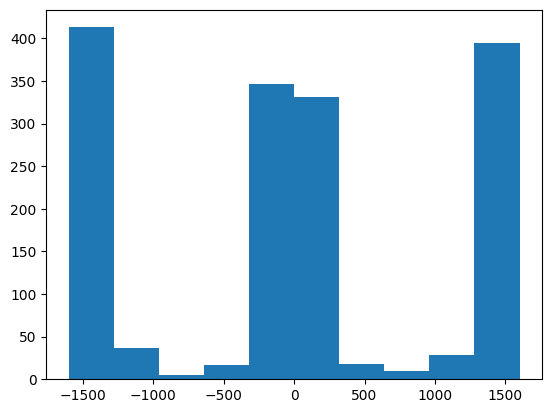

In [242]:
#renaming X_chosen to X
X = np.array(X_chosen)
fig, ax = plt.subplots()
ax.hist(np.sum(X, axis = 1))

In [243]:
#calculating covariance matrix
cov = X.T@X/(X.shape[0]-1)
cov

array([[1.00062539, 0.69418386, 0.61788618, ..., 0.57160725, 0.58161351,
        0.6441526 ],
       [0.69418386, 1.00062539, 0.71669794, ..., 0.53283302, 0.55534709,
        0.57035647],
       [0.61788618, 0.71669794, 1.00062539, ..., 0.51657286, 0.51907442,
        0.51907442],
       ...,
       [0.57160725, 0.53283302, 0.51657286, ..., 1.00062539, 0.71044403,
        0.61538462],
       [0.58161351, 0.55534709, 0.51907442, ..., 0.71044403, 1.00062539,
        0.65791119],
       [0.6441526 , 0.57035647, 0.51907442, ..., 0.61538462, 0.65791119,
        1.00062539]])

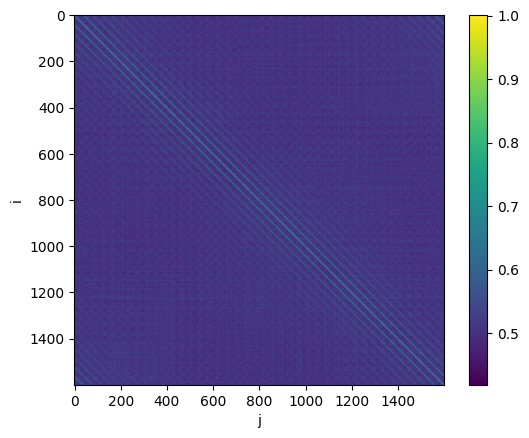

In [257]:
plt.imshow(cov)
plt.colorbar()
plt.xlabel('j')
plt.ylabel('i')
plt.savefig('relazione/immagini/covarianza.png', dpi =800)

In [245]:
u, s, vt = np.linalg.svd(X)
s

array([1.14469397e+03, 1.33132492e+02, 1.19261284e+02, ...,
       8.15952999e-14, 8.15952999e-14, 6.21820579e-14])

In [246]:
#taking first two components of V matrix
v = vt.T
v_reduced = v[:, 0:2]
print(v_reduced.T)

X_reduced = X@v_reduced
print(X_reduced)

[[-0.0249234  -0.02524967 -0.02478064 ... -0.02507219 -0.02457489
  -0.02485795]
 [-0.0057828   0.00469144  0.01640597 ... -0.01786969 -0.00755212
  -0.0030795 ]]
[[-39.9983588   -0.0489864 ]
 [ 39.9983588    0.0489864 ]
 [ 39.9983588    0.0489864 ]
 ...
 [  2.55131642  -1.57031749]
 [ -0.55286095   2.42029831]
 [  3.2336216    0.55100208]]


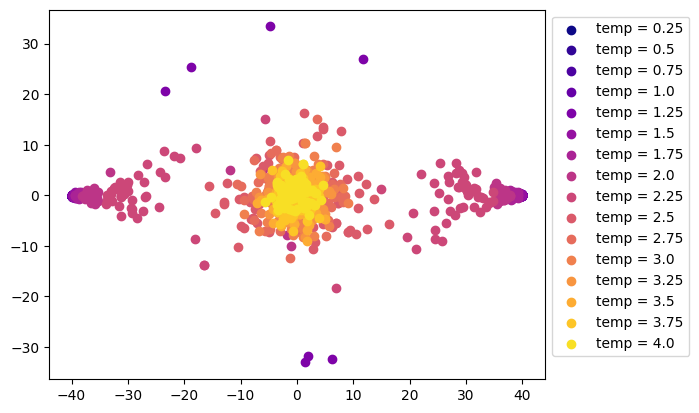

In [247]:
fig, ax = plt.subplots()

#this code is necessary so that colors do not repeat in histogram
cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"temp = {(i+1)*0.25}")
ax.legend(bbox_to_anchor=(1, 1))

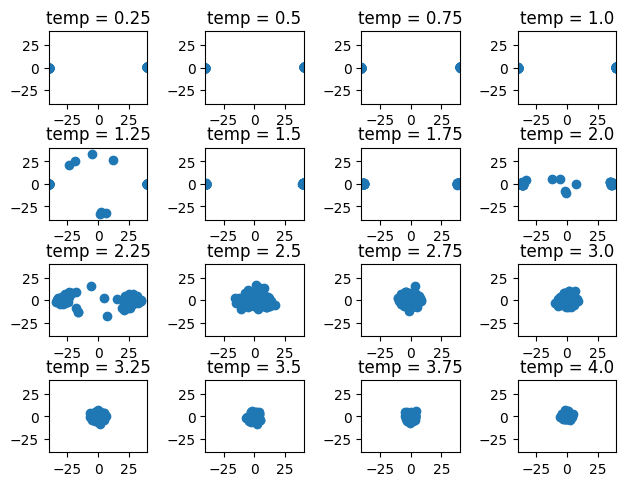

In [248]:
fig, axs = plt.subplots(4,4)
fig.tight_layout()
for i in range(16):
    axs[np.unravel_index(i, (4,4))].scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"temp = {(i+1)*0.25}")
    axs[np.unravel_index(i, (4,4))].set_xlim([-40, 40])
    axs[np.unravel_index(i, (4,4))].set_ylim([-40, 40])
    axs[np.unravel_index(i, (4,4))].set_title(f"temp = {(i+1)*0.25}")


plt.savefig("scatter_plot_matrix", dpi = 800)

In [249]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)
print(pca.components_)

[1144.4784373   133.11578867]
[0.51192344 0.00692546]
[[ 0.02490472  0.0252354   0.02476875 ...  0.02505272  0.02455695
   0.0248554 ]
 [-0.00557492  0.00484598  0.01654226 ... -0.01766461 -0.00738025
  -0.00302164]]


In [250]:
X_reduced = X@pca.components_.T

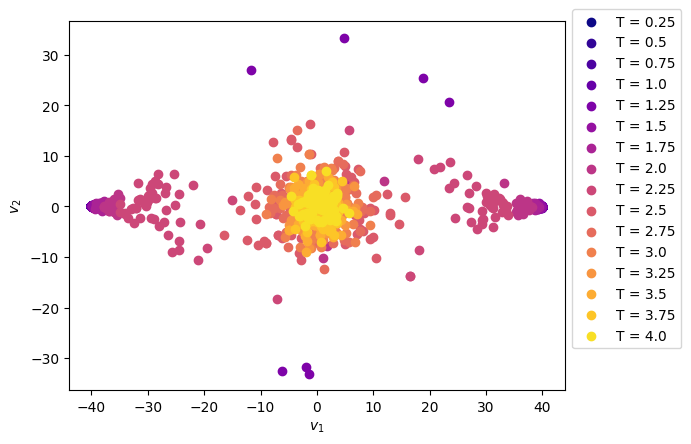

In [251]:
fig, ax = plt.subplots()

cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[100*i:100*(i+1), 0], X_reduced[100*i:100*(i+1), 1], label = f"T = {(i+1)*0.25}")
ax.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.savefig('relazione/immagini/scatter.png', bbox_inches='tight', dpi = 1000)